# 1. Import necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# 2. Import data files

In [3]:
file_path=Path('../data/raw')
train=pd.read_csv(os.path.join(file_path,'train.csv'),index_col='ID')
test=pd.read_csv(os.path.join(file_path,'test.csv'))
sample=pd.read_csv(os.path.join(file_path,'sample_submission.csv'))
data=pd.read_csv(os.path.join(file_path,'data_dictionary.csv'))

# 3. Data Overview

In [4]:
print('train_shape',train.shape)
print('test_shape',test.shape)


train_shape (28800, 59)
test_shape (3, 58)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28800 entries, 0 to 28799
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dri_score               28646 non-null  object 
 1   psych_disturb           26738 non-null  object 
 2   cyto_score              20732 non-null  object 
 3   diabetes                26681 non-null  object 
 4   hla_match_c_high        24180 non-null  float64
 5   hla_high_res_8          22971 non-null  float64
 6   tbi_status              28800 non-null  object 
 7   arrhythmia              26598 non-null  object 
 8   hla_low_res_6           25530 non-null  float64
 9   graft_type              28800 non-null  object 
 10  vent_hist               28541 non-null  object 
 11  renal_issue             26885 non-null  object 
 12  pulm_severe             26665 non-null  object 
 13  prim_disease_hct        28800 non-null  object 
 14  hla_high_res_6          23516 non-null  flo

In [6]:
train.isnull().sum()[(train.isnull().sum()/train.shape[0]).gt(0.10)] # greater than 10 percent null value.

cyto_score                 8068
hla_match_c_high           4620
hla_high_res_8             5829
hla_low_res_6              3270
hla_high_res_6             5284
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_dqb1_low         4194
cyto_score_detail         11923
conditioning_intensity     4789
mrd_hct                   16597
tce_match                 18996
hla_match_a_high           4301
hla_match_b_high           4088
tce_div_match             11396
hla_low_res_8              3653
hla_match_drb1_high        3352
hla_low_res_10             5064
dtype: int64

# 4. Descriptive Statistics

In [8]:
train.describe()

,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,24606.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,1.773795,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,0.427130,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


In [9]:
numerical_col=[]
categorical_col=[]
for i in train.columns:
    if pd.api.types.is_numeric_dtype(train[i]):
        numerical_col.append(i)
    else:
        categorical_col.append(i)

In [10]:
print('categorical _columns: ',len(categorical_col))
print('numerical_columns: ',len(numerical_col))

categorical _columns:  35
numerical_columns:  24


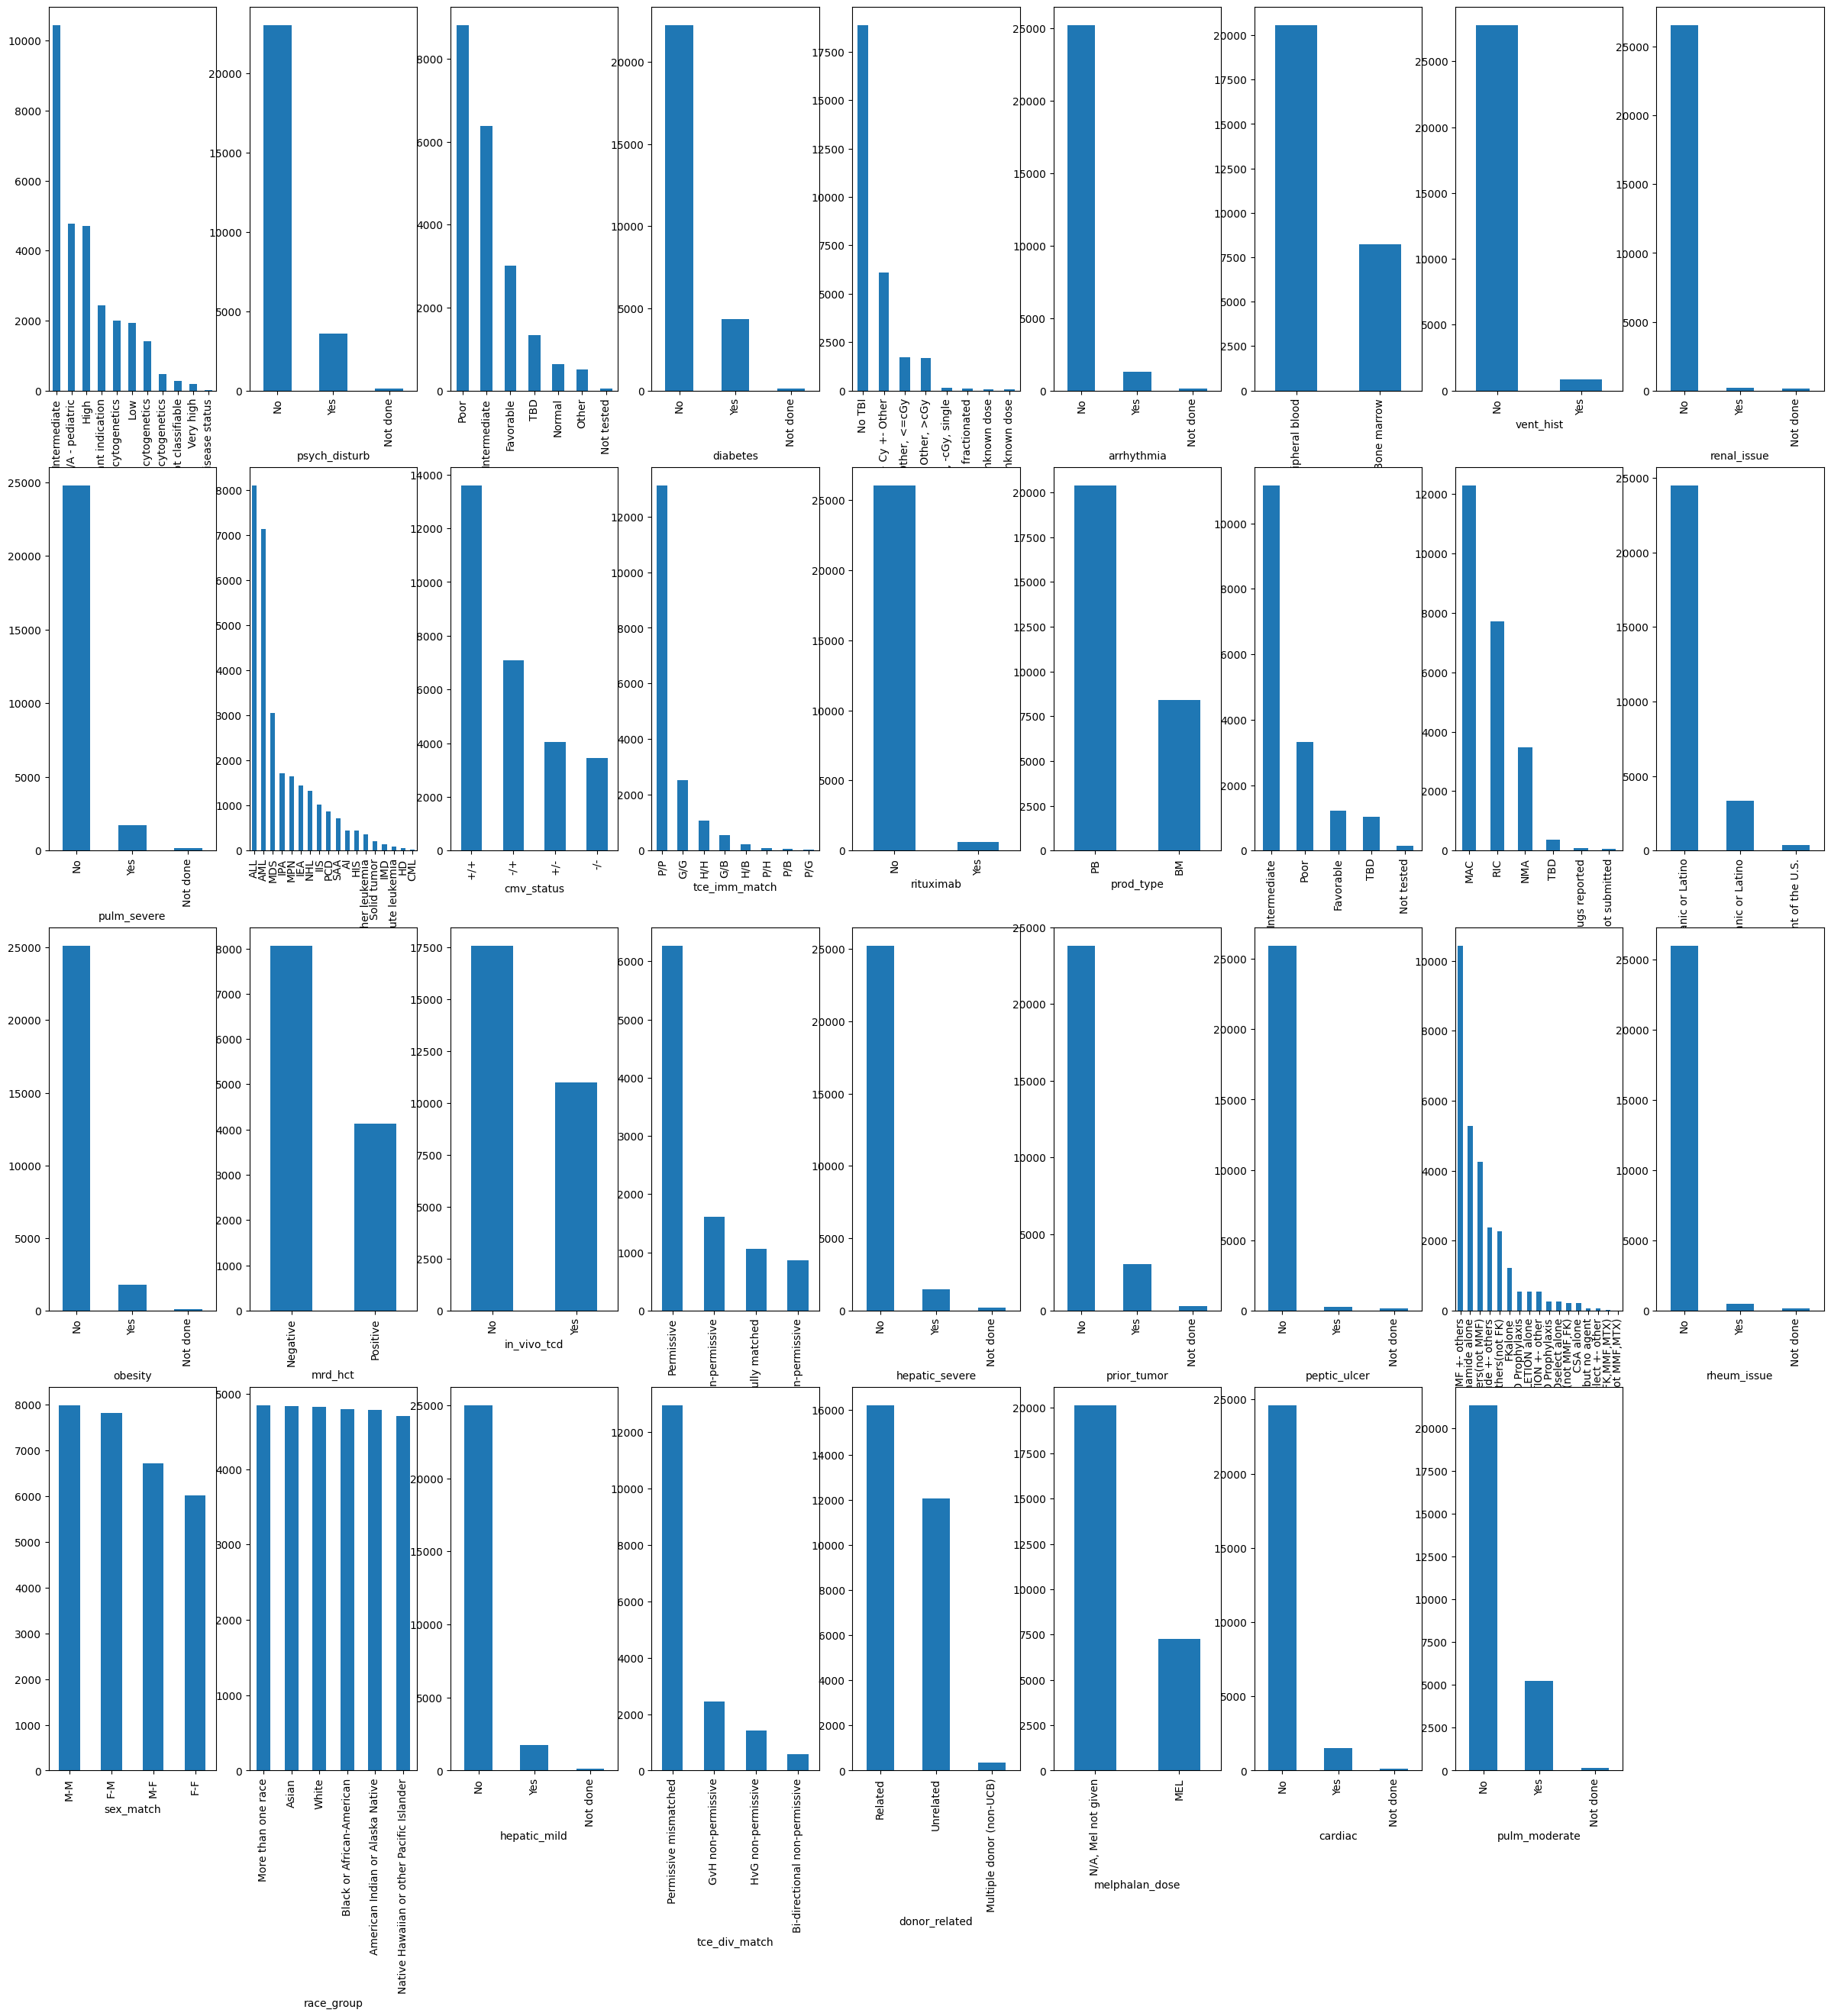

In [11]:
plt.figure(figsize=(30,30))
for i,j in enumerate(categorical_col):
    plt.subplot(4,9,i+1)
    train[j].value_counts().plot(kind='bar')

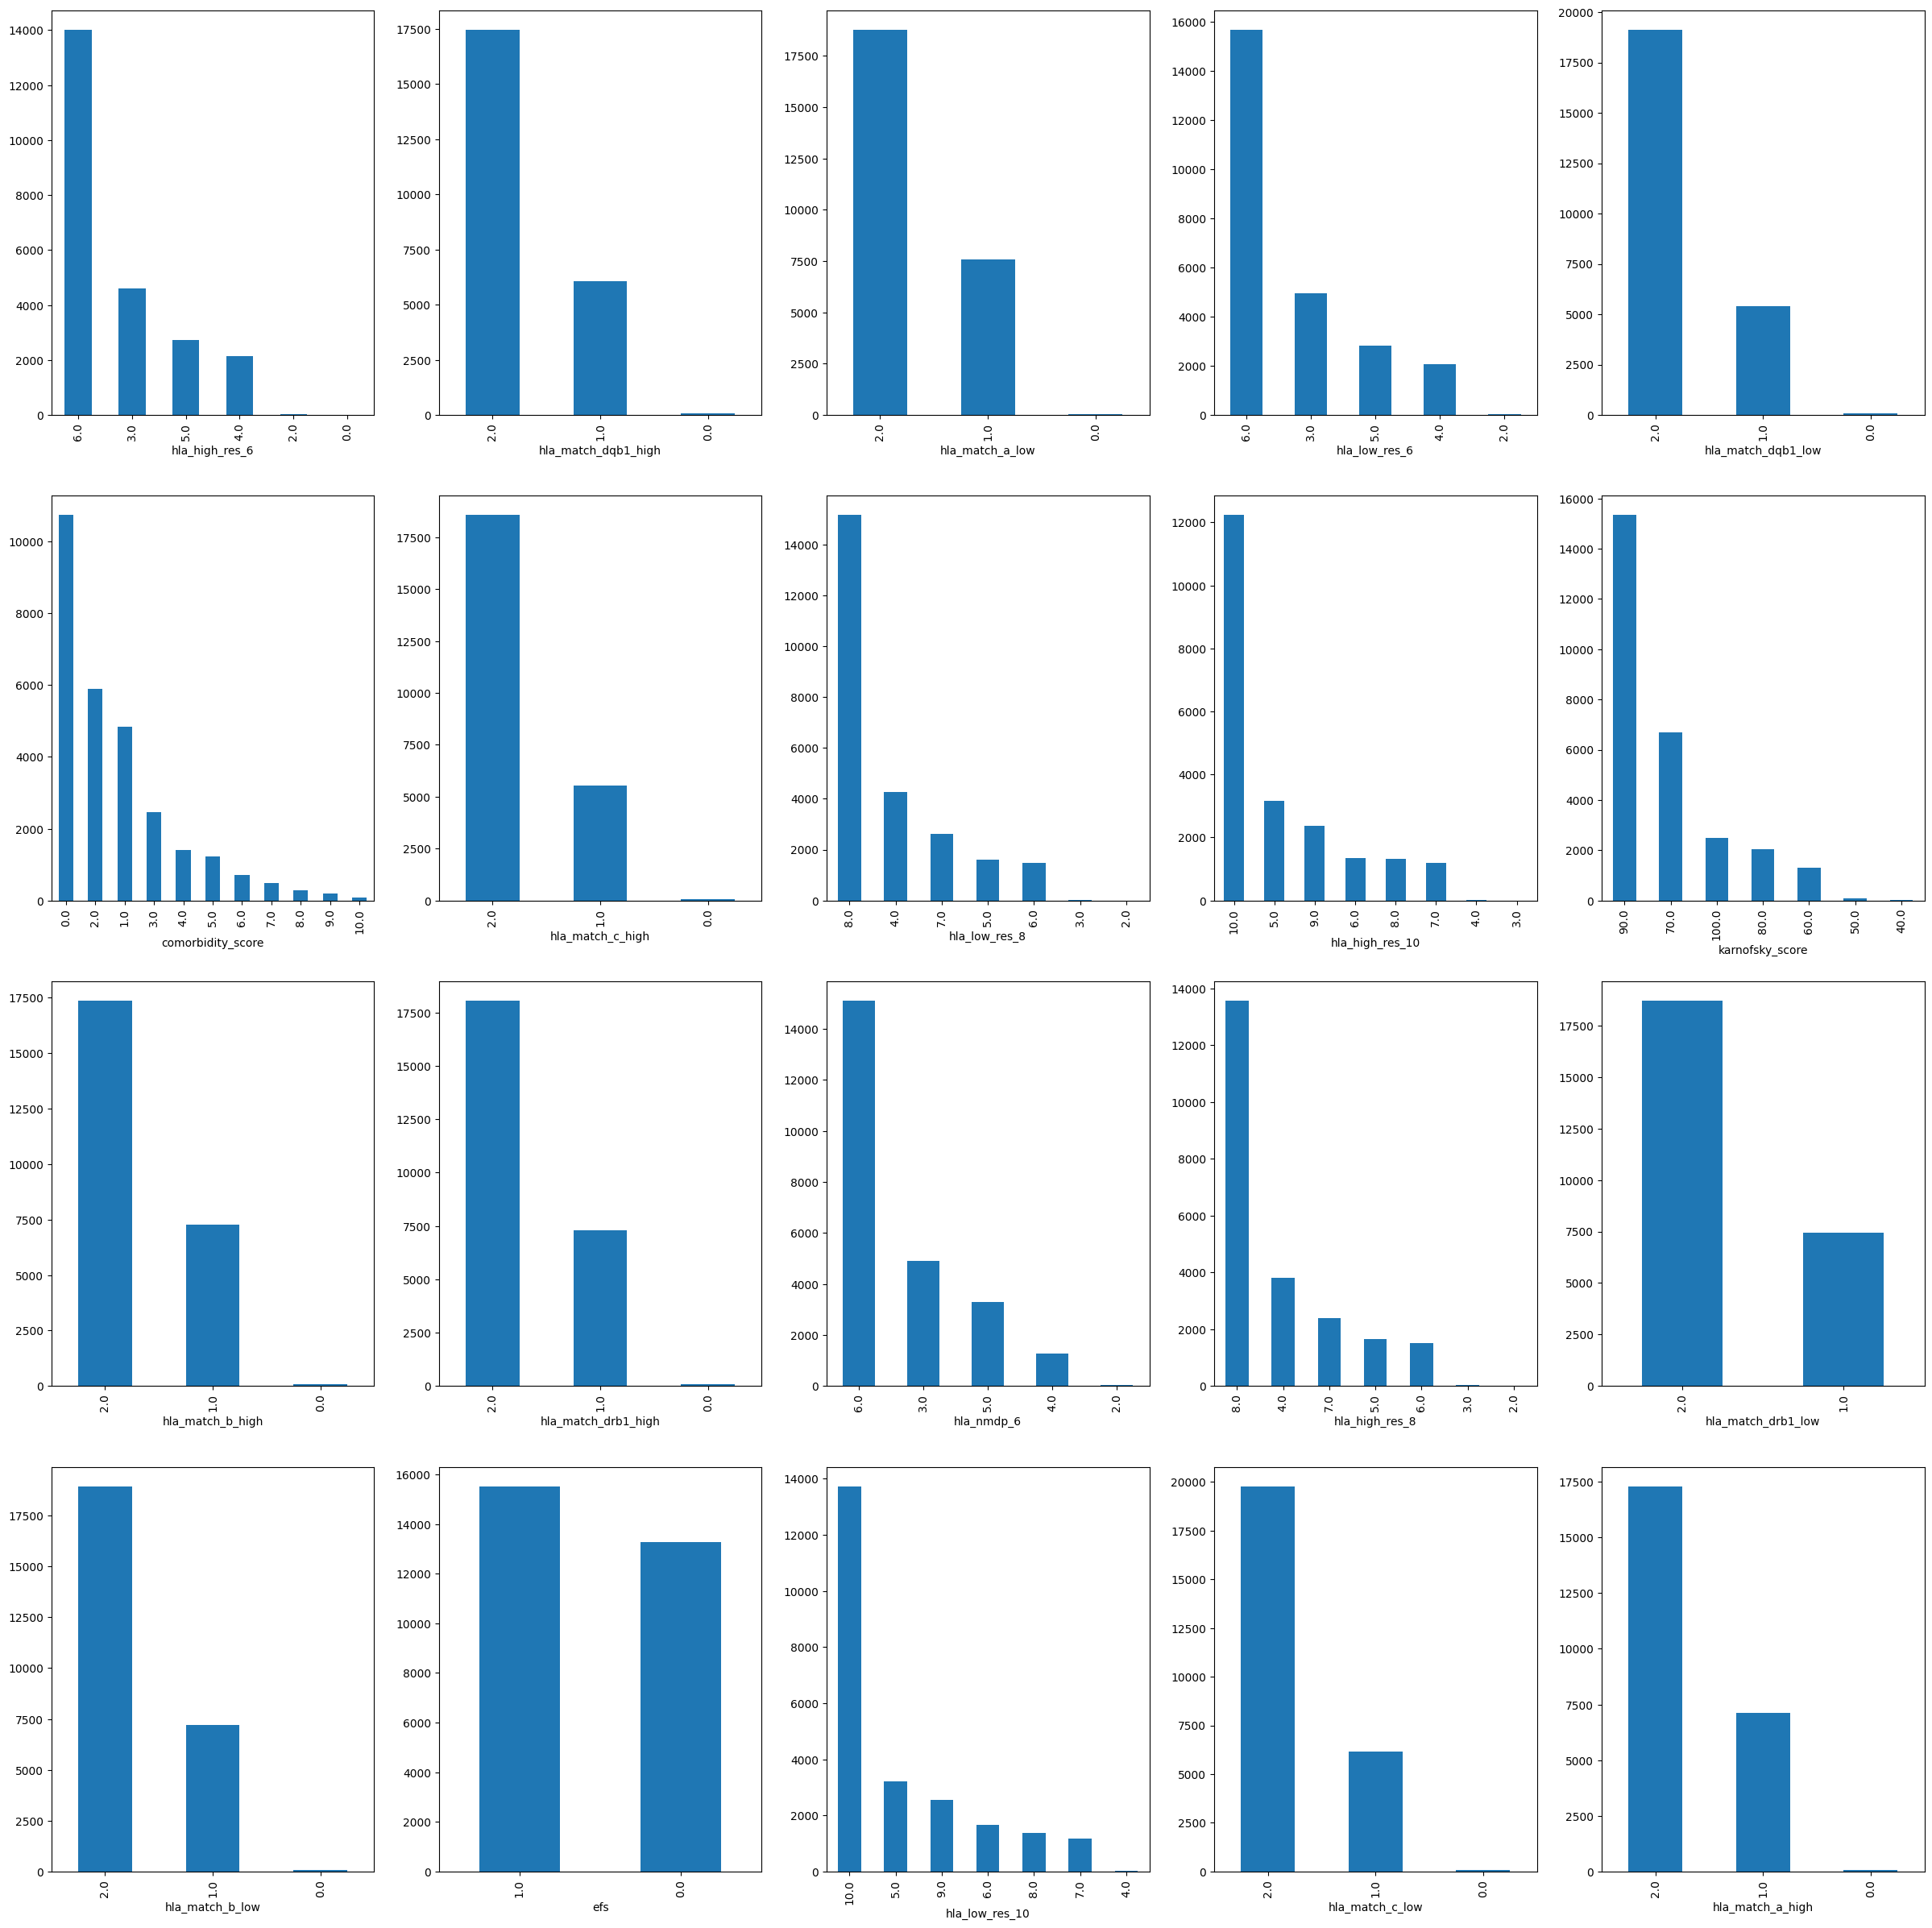

In [29]:
plt.figure(figsize=(30,30))
drop_list=['efs_time','age_at_hct','year_hct','donor_age']
for i,j in enumerate(set(numerical_col)-set(drop_list)):
    plt.subplot(4,5,i+1)
    train[j].value_counts().plot(kind='bar')

# 5. Handling Missing Values

In [31]:
# not too much missing value show simply ignore and directly in model training pipeline handle it

# 6. Outlier Detection

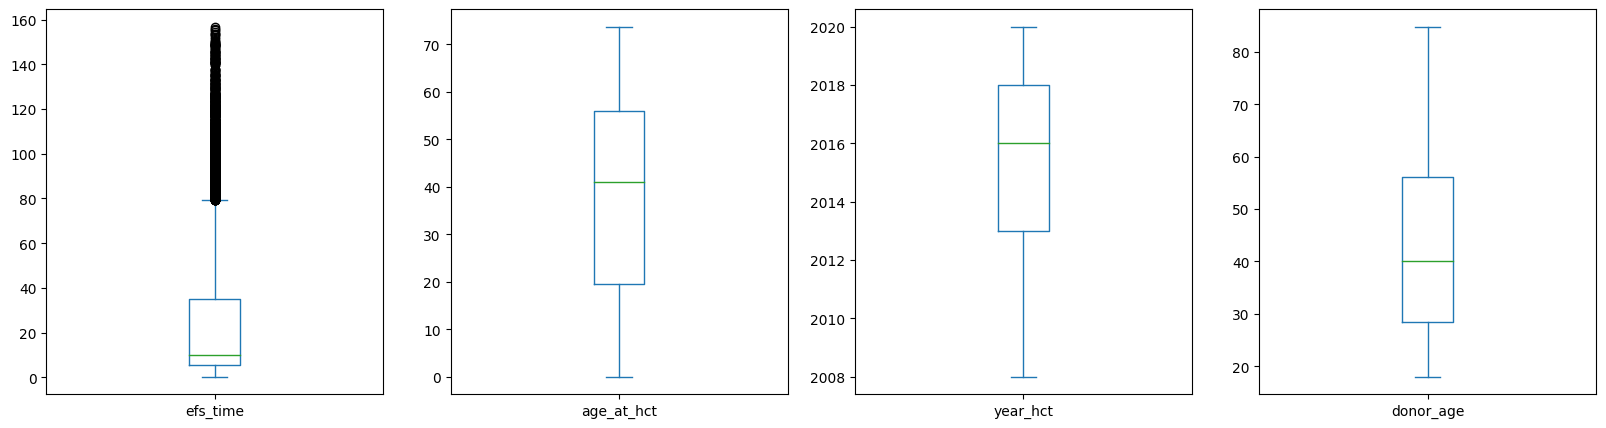

In [39]:
continuous_col=['efs_time','age_at_hct','year_hct','donor_age']
plt.figure(figsize=(20,5))
for i,j in enumerate(continuous_col):
    plt.subplot(1,4,i+1)
    train[j].plot(kind='box')

# 7. Correlation analysis

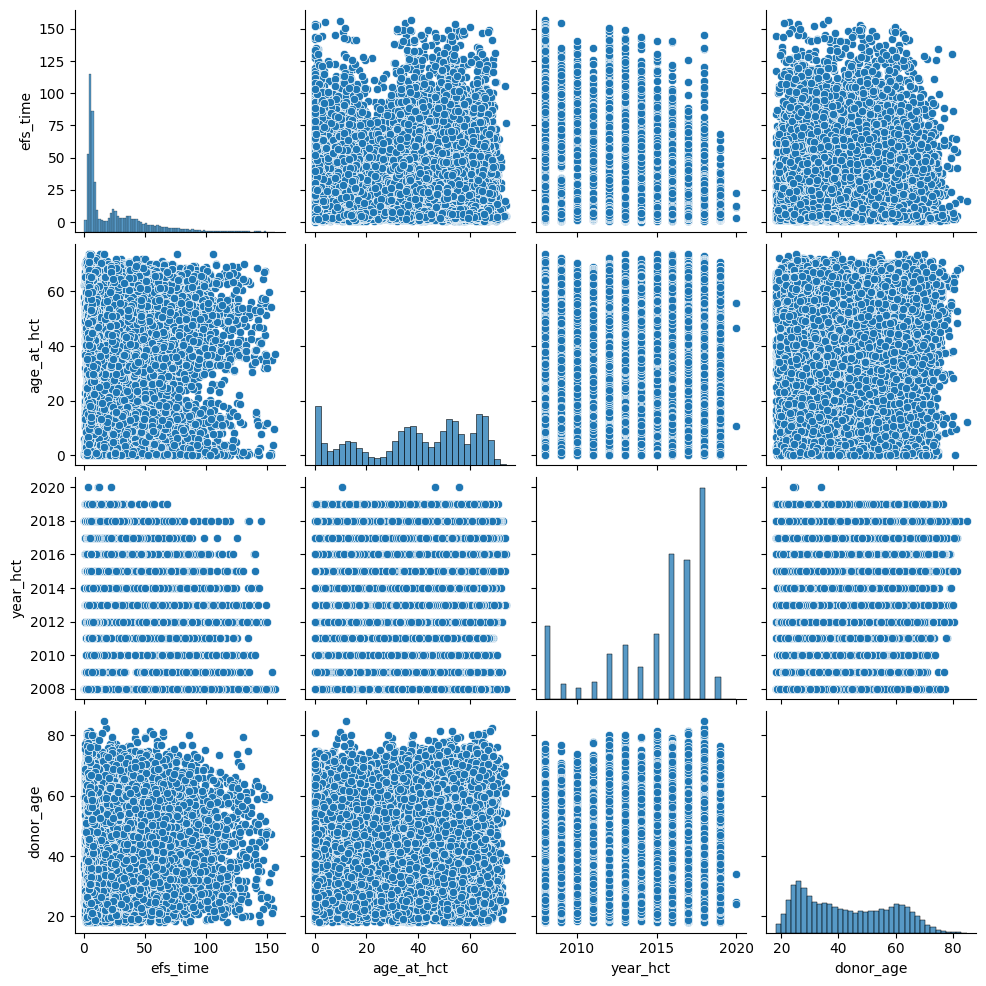

In [40]:
sns.pairplot(train[continuous_col])

# 8. Class Imbalance

<Axes: xlabel='efs'>

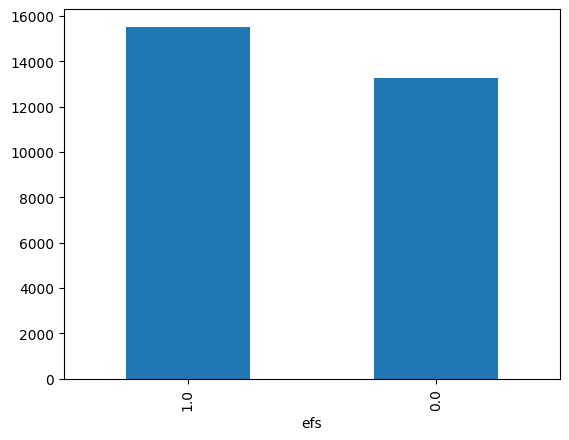

In [41]:
train.efs.value_counts().plot(kind='bar')

Note: Calss is balanced.